In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
input = df.drop(["PassengerId","Ticket","Name","Cabin","Fare"],axis="columns")
input.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


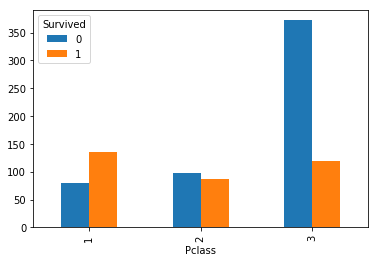

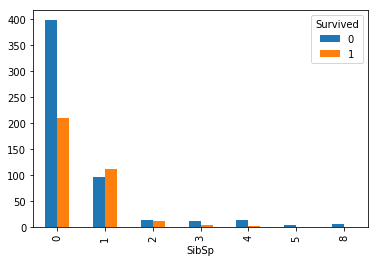

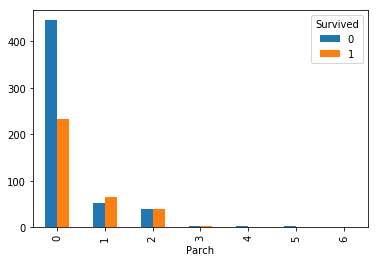

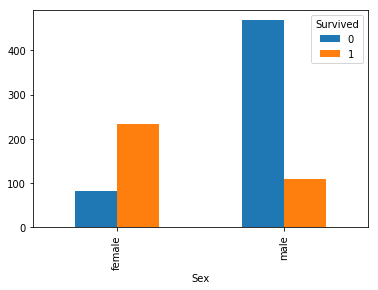

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.crosstab(input["Pclass"],input["Survived"]).plot(kind="bar")
pd.crosstab(input["SibSp"],input["Survived"]).plot(kind="bar")
pd.crosstab(input["Parch"],input["Survived"]).plot(kind="bar")
pd.crosstab(input["Sex"],input["Survived"]).plot(kind="bar")

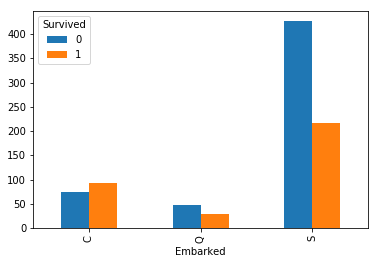

In [75]:
pd.crosstab(input["Embarked"],input["Survived"]).plot(kind="bar")

In [76]:
input =input.fillna(0)

In [77]:
input = pd.get_dummies(input)
y = input["Survived"]
x = input.drop(["Survived"],axis="columns")

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.8)

In [80]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [81]:
predicted_value=model.predict(X_test)

In [82]:
model.score(X_test,y_test)

0.782608695652174